In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import warnings
import sqlite3
from sqlalchemy import create_engine # database connection
import csv
import os
warnings.filterwarnings("ignore")
import datetime as dt
import numpy as np
from nltk.corpus import stopwords
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold 
from collections import Counter, defaultdict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import math
from sklearn.metrics import normalized_mutual_info_score
from sklearn.ensemble import RandomForestClassifier



from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier
from mlxtend.classifier import StackingClassifier

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, auc, roc_curve

<h1>4. Machine Learning Models </h1>

<h2> 4.1 Reading data from file and storing into sql table </h2>

In [2]:
#Creating db file from csv
if not os.path.isfile('train.db'):
    disk_engine = create_engine('sqlite:///train.db')
    start = dt.datetime.now()
    chunksize = 180000
    j = 0
    index_start = 1
#     for df in pd.read_csv('final_features.csv', names=['Unnamed: 0','id','is_duplicate','cwc_min','cwc_max','csc_min','csc_max','ctc_min','ctc_max','last_word_eq','first_word_eq','abs_len_diff','mean_len','token_set_ratio','token_sort_ratio','fuzz_ratio','fuzz_partial_ratio','longest_substr_ratio','freq_qid1','freq_qid2','q1len','q2len','q1_n_words','q2_n_words','word_Common','word_Total','word_share','freq_q1+q2','freq_q1-q2','0_x','1_x','2_x','3_x','4_x','5_x','6_x','7_x','8_x','9_x','10_x','11_x','12_x','13_x','14_x','15_x','16_x','17_x','18_x','19_x','20_x','21_x','22_x','23_x','24_x','25_x','26_x','27_x','28_x','29_x','30_x','31_x','32_x','33_x','34_x','35_x','36_x','37_x','38_x','39_x','40_x','41_x','42_x','43_x','44_x','45_x','46_x','47_x','48_x','49_x','50_x','51_x','52_x','53_x','54_x','55_x','56_x','57_x','58_x','59_x','60_x','61_x','62_x','63_x','64_x','65_x','66_x','67_x','68_x','69_x','70_x','71_x','72_x','73_x','74_x','75_x','76_x','77_x','78_x','79_x','80_x','81_x','82_x','83_x','84_x','85_x','86_x','87_x','88_x','89_x','90_x','91_x','92_x','93_x','94_x','95_x','96_x','97_x','98_x','99_x','100_x','101_x','102_x','103_x','104_x','105_x','106_x','107_x','108_x','109_x','110_x','111_x','112_x','113_x','114_x','115_x','116_x','117_x','118_x','119_x','120_x','121_x','122_x','123_x','124_x','125_x','126_x','127_x','128_x','129_x','130_x','131_x','132_x','133_x','134_x','135_x','136_x','137_x','138_x','139_x','140_x','141_x','142_x','143_x','144_x','145_x','146_x','147_x','148_x','149_x','150_x','151_x','152_x','153_x','154_x','155_x','156_x','157_x','158_x','159_x','160_x','161_x','162_x','163_x','164_x','165_x','166_x','167_x','168_x','169_x','170_x','171_x','172_x','173_x','174_x','175_x','176_x','177_x','178_x','179_x','180_x','181_x','182_x','183_x','184_x','185_x','186_x','187_x','188_x','189_x','190_x','191_x','192_x','193_x','194_x','195_x','196_x','197_x','198_x','199_x','200_x','201_x','202_x','203_x','204_x','205_x','206_x','207_x','208_x','209_x','210_x','211_x','212_x','213_x','214_x','215_x','216_x','217_x','218_x','219_x','220_x','221_x','222_x','223_x','224_x','225_x','226_x','227_x','228_x','229_x','230_x','231_x','232_x','233_x','234_x','235_x','236_x','237_x','238_x','239_x','240_x','241_x','242_x','243_x','244_x','245_x','246_x','247_x','248_x','249_x','250_x','251_x','252_x','253_x','254_x','255_x','256_x','257_x','258_x','259_x','260_x','261_x','262_x','263_x','264_x','265_x','266_x','267_x','268_x','269_x','270_x','271_x','272_x','273_x','274_x','275_x','276_x','277_x','278_x','279_x','280_x','281_x','282_x','283_x','284_x','285_x','286_x','287_x','288_x','289_x','290_x','291_x','292_x','293_x','294_x','295_x','296_x','297_x','298_x','299_x','300_x','301_x','302_x','303_x','304_x','305_x','306_x','307_x','308_x','309_x','310_x','311_x','312_x','313_x','314_x','315_x','316_x','317_x','318_x','319_x','320_x','321_x','322_x','323_x','324_x','325_x','326_x','327_x','328_x','329_x','330_x','331_x','332_x','333_x','334_x','335_x','336_x','337_x','338_x','339_x','340_x','341_x','342_x','343_x','344_x','345_x','346_x','347_x','348_x','349_x','350_x','351_x','352_x','353_x','354_x','355_x','356_x','357_x','358_x','359_x','360_x','361_x','362_x','363_x','364_x','365_x','366_x','367_x','368_x','369_x','370_x','371_x','372_x','373_x','374_x','375_x','376_x','377_x','378_x','379_x','380_x','381_x','382_x','383_x','0_y','1_y','2_y','3_y','4_y','5_y','6_y','7_y','8_y','9_y','10_y','11_y','12_y','13_y','14_y','15_y','16_y','17_y','18_y','19_y','20_y','21_y','22_y','23_y','24_y','25_y','26_y','27_y','28_y','29_y','30_y','31_y','32_y','33_y','34_y','35_y','36_y','37_y','38_y','39_y','40_y','41_y','42_y','43_y','44_y','45_y','46_y','47_y','48_y','49_y','50_y','51_y','52_y','53_y','54_y','55_y','56_y','57_y','58_y','59_y','60_y','61_y','62_y','63_y','64_y','65_y','66_y','67_y','68_y','69_y','70_y','71_y','72_y','73_y','74_y','75_y','76_y','77_y','78_y','79_y','80_y','81_y','82_y','83_y','84_y','85_y','86_y','87_y','88_y','89_y','90_y','91_y','92_y','93_y','94_y','95_y','96_y','97_y','98_y','99_y','100_y','101_y','102_y','103_y','104_y','105_y','106_y','107_y','108_y','109_y','110_y','111_y','112_y','113_y','114_y','115_y','116_y','117_y','118_y','119_y','120_y','121_y','122_y','123_y','124_y','125_y','126_y','127_y','128_y','129_y','130_y','131_y','132_y','133_y','134_y','135_y','136_y','137_y','138_y','139_y','140_y','141_y','142_y','143_y','144_y','145_y','146_y','147_y','148_y','149_y','150_y','151_y','152_y','153_y','154_y','155_y','156_y','157_y','158_y','159_y','160_y','161_y','162_y','163_y','164_y','165_y','166_y','167_y','168_y','169_y','170_y','171_y','172_y','173_y','174_y','175_y','176_y','177_y','178_y','179_y','180_y','181_y','182_y','183_y','184_y','185_y','186_y','187_y','188_y','189_y','190_y','191_y','192_y','193_y','194_y','195_y','196_y','197_y','198_y','199_y','200_y','201_y','202_y','203_y','204_y','205_y','206_y','207_y','208_y','209_y','210_y','211_y','212_y','213_y','214_y','215_y','216_y','217_y','218_y','219_y','220_y','221_y','222_y','223_y','224_y','225_y','226_y','227_y','228_y','229_y','230_y','231_y','232_y','233_y','234_y','235_y','236_y','237_y','238_y','239_y','240_y','241_y','242_y','243_y','244_y','245_y','246_y','247_y','248_y','249_y','250_y','251_y','252_y','253_y','254_y','255_y','256_y','257_y','258_y','259_y','260_y','261_y','262_y','263_y','264_y','265_y','266_y','267_y','268_y','269_y','270_y','271_y','272_y','273_y','274_y','275_y','276_y','277_y','278_y','279_y','280_y','281_y','282_y','283_y','284_y','285_y','286_y','287_y','288_y','289_y','290_y','291_y','292_y','293_y','294_y','295_y','296_y','297_y','298_y','299_y','300_y','301_y','302_y','303_y','304_y','305_y','306_y','307_y','308_y','309_y','310_y','311_y','312_y','313_y','314_y','315_y','316_y','317_y','318_y','319_y','320_y','321_y','322_y','323_y','324_y','325_y','326_y','327_y','328_y','329_y','330_y','331_y','332_y','333_y','334_y','335_y','336_y','337_y','338_y','339_y','340_y','341_y','342_y','343_y','344_y','345_y','346_y','347_y','348_y','349_y','350_y','351_y','352_y','353_y','354_y','355_y','356_y','357_y','358_y','359_y','360_y','361_y','362_y','363_y','364_y','365_y','366_y','367_y','368_y','369_y','370_y','371_y','372_y','373_y','374_y','375_y','376_y','377_y','378_y','379_y','380_y','381_y','382_y','383_y'], chunksize=chunksize, iterator=True, encoding='utf-8', ):
    for df in pd.read_csv('final_features.csv', names=['Unnamed: 0','id','is_duplicate','cwc_min','cwc_max','csc_min','csc_max','ctc_min','ctc_max','last_word_eq','first_word_eq','abs_len_diff','mean_len','token_set_ratio','token_sort_ratio','fuzz_ratio','fuzz_partial_ratio','longest_substr_ratio','freq_qid1','freq_qid2','q1len','q2len','q1_n_words','q2_n_words','word_Common','word_Total','word_share','freq_q1+q2','freq_q1-q2','0_x','1_x','2_x','3_x','4_x','5_x','6_x','7_x','8_x','9_x','10_x','11_x','12_x','13_x','14_x','15_x','16_x','17_x','18_x','19_x','20_x','21_x','22_x','23_x','24_x','25_x','26_x','27_x','28_x','29_x','30_x','31_x','32_x','33_x','34_x','35_x','36_x','37_x','38_x','39_x','40_x','41_x','42_x','43_x','44_x','45_x','46_x','47_x','48_x','49_x','50_x','51_x','52_x','53_x','54_x','55_x','56_x','57_x','58_x','59_x','60_x','61_x','62_x','63_x','64_x','65_x','66_x','67_x','68_x','69_x','70_x','71_x','72_x','73_x','74_x','75_x','76_x','77_x','78_x','79_x','80_x','81_x','82_x','83_x','84_x','85_x','86_x','87_x','88_x','89_x','90_x','91_x','92_x','93_x','94_x','95_x','96_x','97_x','98_x','99_x','100_x','101_x','102_x','103_x','104_x','105_x','106_x','107_x','108_x','109_x','110_x','111_x','112_x','113_x','114_x','115_x','116_x','117_x','118_x','119_x','120_x','121_x','122_x','123_x','124_x','125_x','126_x','127_x','128_x','129_x','130_x','131_x','132_x','133_x','134_x','135_x','136_x','137_x','138_x','139_x','140_x','141_x','142_x','143_x','144_x','145_x','146_x','147_x','148_x','149_x','150_x','151_x','152_x','153_x','154_x','155_x','156_x','157_x','158_x','159_x','160_x','161_x','162_x','163_x','164_x','165_x','166_x','167_x','168_x','169_x','170_x','171_x','172_x','173_x','174_x','175_x','176_x','177_x','178_x','179_x','180_x','181_x','182_x','183_x','184_x','185_x','186_x','187_x','188_x','189_x','190_x','191_x','192_x','193_x','194_x','195_x','196_x','197_x','198_x','199_x','200_x','201_x','202_x','203_x','204_x','205_x','206_x','207_x','208_x','209_x','210_x','211_x','212_x','213_x','214_x','215_x','216_x','217_x','218_x','219_x','220_x','221_x','222_x','223_x','224_x','225_x','226_x','227_x','228_x','229_x','230_x','231_x','232_x','233_x','234_x','235_x','236_x','237_x','238_x','239_x','240_x','241_x','242_x','243_x','244_x','245_x','246_x','247_x','248_x','249_x','250_x','251_x','252_x','253_x','254_x','255_x','256_x','257_x','258_x','259_x','260_x','261_x','262_x','263_x','264_x','265_x','266_x','267_x','268_x','269_x','270_x','271_x','272_x','273_x','274_x','275_x','276_x','277_x','278_x','279_x','280_x','281_x','282_x','283_x','284_x','285_x','286_x','287_x','288_x','289_x','290_x','291_x','292_x','293_x','294_x','295_x','296_x','297_x','298_x','299_x','0_y','1_y','2_y','3_y','4_y','5_y','6_y','7_y','8_y','9_y','10_y','11_y','12_y','13_y','14_y','15_y','16_y','17_y','18_y','19_y','20_y','21_y','22_y','23_y','24_y','25_y','26_y','27_y','28_y','29_y','30_y','31_y','32_y','33_y','34_y','35_y','36_y','37_y','38_y','39_y','40_y','41_y','42_y','43_y','44_y','45_y','46_y','47_y','48_y','49_y','50_y','51_y','52_y','53_y','54_y','55_y','56_y','57_y','58_y','59_y','60_y','61_y','62_y','63_y','64_y','65_y','66_y','67_y','68_y','69_y','70_y','71_y','72_y','73_y','74_y','75_y','76_y','77_y','78_y','79_y','80_y','81_y','82_y','83_y','84_y','85_y','86_y','87_y','88_y','89_y','90_y','91_y','92_y','93_y','94_y','95_y','96_y','97_y','98_y','99_y','100_y','101_y','102_y','103_y','104_y','105_y','106_y','107_y','108_y','109_y','110_y','111_y','112_y','113_y','114_y','115_y','116_y','117_y','118_y','119_y','120_y','121_y','122_y','123_y','124_y','125_y','126_y','127_y','128_y','129_y','130_y','131_y','132_y','133_y','134_y','135_y','136_y','137_y','138_y','139_y','140_y','141_y','142_y','143_y','144_y','145_y','146_y','147_y','148_y','149_y','150_y','151_y','152_y','153_y','154_y','155_y','156_y','157_y','158_y','159_y','160_y','161_y','162_y','163_y','164_y','165_y','166_y','167_y','168_y','169_y','170_y','171_y','172_y','173_y','174_y','175_y','176_y','177_y','178_y','179_y','180_y','181_y','182_y','183_y','184_y','185_y','186_y','187_y','188_y','189_y','190_y','191_y','192_y','193_y','194_y','195_y','196_y','197_y','198_y','199_y','200_y','201_y','202_y','203_y','204_y','205_y','206_y','207_y','208_y','209_y','210_y','211_y','212_y','213_y','214_y','215_y','216_y','217_y','218_y','219_y','220_y','221_y','222_y','223_y','224_y','225_y','226_y','227_y','228_y','229_y','230_y','231_y','232_y','233_y','234_y','235_y','236_y','237_y','238_y','239_y','240_y','241_y','242_y','243_y','244_y','245_y','246_y','247_y','248_y','249_y','250_y','251_y','252_y','253_y','254_y','255_y','256_y','257_y','258_y','259_y','260_y','261_y','262_y','263_y','264_y','265_y','266_y','267_y','268_y','269_y','270_y','271_y','272_y','273_y','274_y','275_y','276_y','277_y','278_y','279_y','280_y','281_y','282_y','283_y','284_y','285_y','286_y','287_y','288_y','289_y','290_y','291_y','292_y','293_y','294_y','295_y','296_y','297_y','298_y','299_y'], chunksize=chunksize, iterator=True, encoding='utf-8', ):
        df.index += index_start
        j+=1
        print('{} rows'.format(j*chunksize))
        df.to_sql('data', disk_engine, if_exists='append')
        index_start = df.index[-1] + 1

180000 rows
360000 rows
540000 rows


In [3]:
#http://www.sqlitetutorial.net/sqlite-python/create-tables/
def create_connection(db_file):
    """ create a database connection to the SQLite database
        specified by db_file
    :param db_file: database file
    :return: Connection object or None
    """
    try:
        conn = sqlite3.connect(db_file)
        return conn
    except Error as e:
        print(e)
 
    return None


def checkTableExists(dbcon):
    cursr = dbcon.cursor()
    str = "select name from sqlite_master where type='table'"
    table_names = cursr.execute(str)
    print("Tables in the databse:")
    tables =table_names.fetchall() 
    print(tables[0][0])
    return(len(tables))

In [4]:
read_db = 'train.db'
conn_r = create_connection(read_db)
checkTableExists(conn_r)
conn_r.close()

Tables in the databse:
data


In [5]:
# try to sample data according to the computing power you have
if os.path.isfile(read_db):
    conn_r = create_connection(read_db)
    if conn_r is not None:
        # for selecting first 1M rows
        # data = pd.read_sql_query("""SELECT * FROM data LIMIT 100001;""", conn_r)
        
        # for selecting random points
        data = pd.read_sql_query("SELECT * From data ORDER BY RANDOM() LIMIT 100001;", conn_r)
        conn_r.commit()
        conn_r.close()

In [6]:
# remove the first row 
data.drop(data.index[0], inplace=True)
y_true = data['is_duplicate']
data.drop(['Unnamed: 0', 'id','index','is_duplicate'], axis=1, inplace=True)

In [7]:
data.head()

,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,...,290_y,291_y,292_y,293_y,294_y,295_y,296_y,297_y,298_y,299_y
1,0.199996000079998,0.111109876556927,0.799984000319994,0.22222098766118,0.454541322351615,0.15151469237972,0.0,0.0,22.0,22.0,...,-40.797933138907,8.97839166130871,-8.08087987091858,-5.95069866674021,21.62886095047,3.83761356770992,-20.3113829344511,-3.94237789511681,32.9755200780928,6.6558423275128
2,0.0,0.0,0.399992000159997,0.249996875039062,0.249996875039062,0.0999995000025,0.0,0.0,12.0,14.0,...,-5.10840830206871,-12.7033559828997,3.01767840236425,-5.51216715574264,-1.6194202452898,3.46952717006207,-16.5749972909689,3.01555845141411,-2.97053062915802,9.47112828493118
3,0.999975000624984,0.666655555740738,0.999975000624984,0.444439506227709,0.799992000079999,0.444441975322359,0.0,1.0,8.0,14.0,...,-8.16833129525185,-7.98917800188065,-6.4671797528863,-1.74959287047386,0.744230836629868,4.27597142755985,5.14116267859936,-6.29830634593964,0.734777197241783,-10.2557970052585
4,0.249993750156246,0.199996000079998,0.66664444518516,0.285710204139941,0.374995312558593,0.249997916684028,0.0,1.0,4.0,10.0,...,-3.5118428170681,9.3120232373476,11.2907861545682,-4.91546251252294,-9.53268766403198,5.91840241849422,18.6559449359775,-0.233358412981033,-2.37264208495617,-0.541556566953659
5,0.749981250468738,0.599988000239995,0.0,0.0,0.599988000239995,0.374995312558593,0.0,0.0,3.0,6.5,...,-3.97895254939795,9.72298616170883,6.70482552051544,2.72654302418232,8.79498007893562,-9.00952172279358,-16.9633708233014,-2.12013705074787,-6.94663305580616,5.1492529809475


<h2> 4.2 Converting strings to numerics </h2>

In [8]:
# after we read from sql table each entry was read it as a string
# we convert all the features into numeric before we apply any model
cols = list(data.columns)
for i in cols:
    data[i] = data[i].apply(pd.to_numeric)
    print(i)

cwc_min
cwc_max
csc_min
csc_max
ctc_min
ctc_max
last_word_eq
first_word_eq
abs_len_diff
mean_len
token_set_ratio
token_sort_ratio
fuzz_ratio
fuzz_partial_ratio
longest_substr_ratio
freq_qid1
freq_qid2
q1len
q2len
q1_n_words
q2_n_words
word_Common
word_Total
word_share
freq_q1+q2
freq_q1-q2
0_x
1_x
2_x
3_x
4_x
5_x
6_x
7_x
8_x
9_x
10_x
11_x
12_x
13_x
14_x
15_x
16_x
17_x
18_x
19_x
20_x
21_x
22_x
23_x
24_x
25_x
26_x
27_x
28_x
29_x
30_x
31_x
32_x
33_x
34_x
35_x
36_x
37_x
38_x
39_x
40_x
41_x
42_x
43_x
44_x
45_x
46_x
47_x
48_x
49_x
50_x
51_x
52_x
53_x
54_x
55_x
56_x
57_x
58_x
59_x
60_x
61_x
62_x
63_x
64_x
65_x
66_x
67_x
68_x
69_x
70_x
71_x
72_x
73_x
74_x
75_x
76_x
77_x
78_x
79_x
80_x
81_x
82_x
83_x
84_x
85_x
86_x
87_x
88_x
89_x
90_x
91_x
92_x
93_x
94_x
95_x
96_x
97_x
98_x
99_x
100_x
101_x
102_x
103_x
104_x
105_x
106_x
107_x
108_x
109_x
110_x
111_x
112_x
113_x
114_x
115_x
116_x
117_x
118_x
119_x
120_x
121_x
122_x
123_x
124_x
125_x
126_x
127_x
128_x
129_x
130_x
131_x
132_x
133_x
134_x
135_x
136

In [9]:
# https://stackoverflow.com/questions/7368789/convert-all-strings-in-a-list-to-int
y_true = list(map(int, y_true.values))

In [16]:
data

,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,...,290_y,291_y,292_y,293_y,294_y,295_y,296_y,297_y,298_y,299_y
1,0.199996,0.111110,0.799984,0.222221,0.454541,0.151515,0.0,0.0,22.0,22.0,...,-40.797933,8.978392,-8.080880,-5.950699,21.628861,3.837614,-20.311383,-3.942378,32.975520,6.655842
2,0.000000,0.000000,0.399992,0.249997,0.249997,0.100000,0.0,0.0,12.0,14.0,...,-5.108408,-12.703356,3.017678,-5.512167,-1.619420,3.469527,-16.574997,3.015558,-2.970531,9.471128
3,0.999975,0.666656,0.999975,0.444440,0.799992,0.444442,0.0,1.0,8.0,14.0,...,-8.168331,-7.989178,-6.467180,-1.749593,0.744231,4.275971,5.141163,-6.298306,0.734777,-10.255797
4,0.249994,0.199996,0.666644,0.285710,0.374995,0.249998,0.0,1.0,4.0,10.0,...,-3.511843,9.312023,11.290786,-4.915463,-9.532688,5.918402,18.655945,-0.233358,-2.372642,-0.541557
5,0.749981,0.599988,0.000000,0.000000,0.599988,0.374995,0.0,0.0,3.0,6.5,...,-3.978953,9.722986,6.704826,2.726543,8.794980,-9.009522,-16.963371,-2.120137,-6.946633,5.149253
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99996,0.333328,0.199998,0.499994,0.285712,0.399997,0.206896,0.0,0.0,14.0,22.0,...,3.245802,0.754974,13.394572,-4.647679,29.584796,-6.857585,-10.416787,9.078985,20.266087,20.122613
99997,0.599988,0.499992,0.666656,0.666656,0.636358,0.583328,1.0,1.0,1.0,11.5,...,-29.309599,3.609023,-10.805955,-3.668922,9.851900,12.539252,0.470887,2.304998,2.362773,13.452500
99998,0.714276,0.454541,0.999983,0.599994,0.785709,0.478259,0.0,1.0,9.0,18.5,...,-22.722244,-10.913383,-17.940394,6.191954,11.269378,1.845742,-13.367261,-5.086198,5.820824,16.569165
99999,0.749981,0.428565,0.999967,0.428565,0.857131,0.428568,0.0,0.0,7.0,10.5,...,0.176690,12.176318,-7.185788,-3.287796,0.360768,11.124272,-0.759304,-5.766187,1.475622,-8.526922


In [17]:
y_true

[0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,


<h3>4.2.1 Save (serialize) the python object to save second time running</h3>

In [ ]:
# from sklearn.externals import joblib
# joblib.dump(classifier, 'lr_with_more_title_weight_bow_simple_lr_1MM.pkl') 


# classifier = joblib.load('lr_with_more_title_weight_bow_simple_lr_1MM.pkl') 

In [46]:
from sklearn.externals import joblib

/Users/mayankgupta/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [4]:
joblib.dump(data, 'processed_data_with_300_d.pkl')

In [20]:
joblib.dump(y_true, 'class_label_300_d.pkl')

['class_label_300_d.pkl']

In [47]:
data_from_disk = joblib.load('processed_data_with_300_d.pkl')

In [48]:
y_true_from_disk = joblib.load('class_label_300_d.pkl')

In [49]:
data_from_disk

,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,...,290_y,291_y,292_y,293_y,294_y,295_y,296_y,297_y,298_y,299_y
1,0.199996,0.111110,0.799984,0.222221,0.454541,0.151515,0.0,0.0,22.0,22.0,...,-40.797933,8.978392,-8.080880,-5.950699,21.628861,3.837614,-20.311383,-3.942378,32.975520,6.655842
2,0.000000,0.000000,0.399992,0.249997,0.249997,0.100000,0.0,0.0,12.0,14.0,...,-5.108408,-12.703356,3.017678,-5.512167,-1.619420,3.469527,-16.574997,3.015558,-2.970531,9.471128
3,0.999975,0.666656,0.999975,0.444440,0.799992,0.444442,0.0,1.0,8.0,14.0,...,-8.168331,-7.989178,-6.467180,-1.749593,0.744231,4.275971,5.141163,-6.298306,0.734777,-10.255797
4,0.249994,0.199996,0.666644,0.285710,0.374995,0.249998,0.0,1.0,4.0,10.0,...,-3.511843,9.312023,11.290786,-4.915463,-9.532688,5.918402,18.655945,-0.233358,-2.372642,-0.541557
5,0.749981,0.599988,0.000000,0.000000,0.599988,0.374995,0.0,0.0,3.0,6.5,...,-3.978953,9.722986,6.704826,2.726543,8.794980,-9.009522,-16.963371,-2.120137,-6.946633,5.149253
6,0.749981,0.749981,0.999980,0.999980,0.888879,0.888879,1.0,1.0,0.0,9.0,...,-1.338060,-2.847187,3.591076,2.681107,-1.502780,8.135663,-6.245612,7.110384,-9.560786,-0.008232
7,0.333322,0.199996,0.333328,0.249997,0.272725,0.199999,0.0,0.0,4.0,13.0,...,-6.030159,0.442590,9.012010,-5.150438,-8.492141,2.556222,-3.526519,9.001639,-4.847330,4.309788
8,0.999967,0.749981,0.749981,0.749981,0.857131,0.749991,1.0,1.0,1.0,7.5,...,-7.301916,6.071443,2.322339,-5.996986,-2.572389,2.892691,-7.748424,-1.177841,-4.149691,-8.250180
9,0.166664,0.083333,0.166664,0.111110,0.142856,0.090909,0.0,0.0,8.0,18.0,...,-8.063692,3.856235,-0.445077,-3.855534,0.291414,1.276975,-5.668518,-6.244662,8.020668,10.943929
10,0.749981,0.749981,0.499975,0.333322,0.666656,0.571420,0.0,1.0,1.0,6.5,...,5.330708,-1.176866,-4.973069,-15.590182,-2.342324,5.010971,-14.394878,-5.150761,-0.733505,-4.396690


In [50]:
y_true_from_disk

[0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,


In [51]:
data = data_from_disk
y_true = y_true_from_disk

<h2> 4.3 Random train test split( 70:30) </h2>

In [52]:
X_train,X_test, y_train, y_test = train_test_split(data, y_true, stratify=y_true, test_size=0.3)

In [53]:
print("Number of data points in train data :",X_train.shape)
print("Number of data points in test data :",X_test.shape)

Number of data points in train data : (70000, 626)
Number of data points in test data : (30000, 626)


In [54]:
print("-"*10, "Distribution of output variable in train data", "-"*10)
train_distr = Counter(y_train)
train_len = len(y_train)
print("Class 0: ",int(train_distr[0])/train_len,"Class 1: ", int(train_distr[1])/train_len)
print("-"*10, "Distribution of output variable in train data", "-"*10)
test_distr = Counter(y_test)
test_len = len(y_test)
print("Class 0: ",int(test_distr[1])/test_len, "Class 1: ",int(test_distr[1])/test_len)

---------- Distribution of output variable in train data ----------
Class 0:  0.6311857142857142 Class 1:  0.3688142857142857
---------- Distribution of output variable in train data ----------
Class 0:  0.3688 Class 1:  0.3688


In [3]:
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    plt.figure(figsize=(20,4))
    
    labels = [1,2]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

<h2> 4.4 Building a random model (Finding worst-case log-loss) </h2>

Log loss on Test Data using Random Model 0.8905921124455075


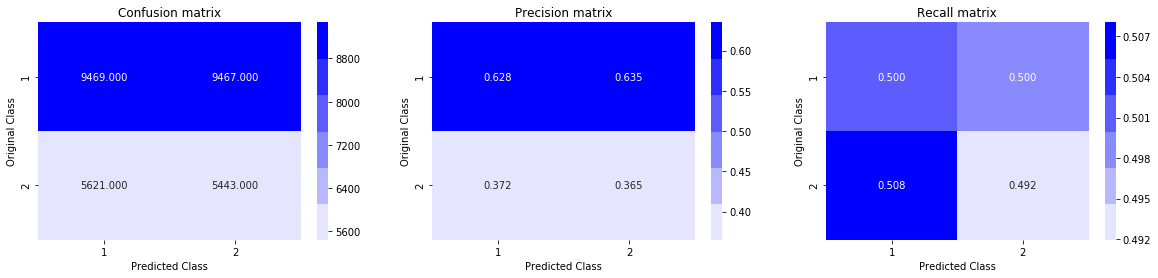

Total time taken to run this cell:  0:00:00.841952


In [30]:
start = dt.datetime.now()
# we need to generate 9 numbers and the sum of numbers should be 1
# one solution is to genarate 9 numbers and divide each of the numbers by their sum
# ref: https://stackoverflow.com/a/18662466/4084039
# we create a output array that has exactly same size as the CV data
predicted_y = np.zeros((test_len,2))
for i in range(test_len):
    rand_probs = np.random.rand(1,2)
    predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Test Data using Random Model",log_loss(y_test, predicted_y, eps=1e-15))

predicted_y =np.argmax(predicted_y, axis=1)
plot_confusion_matrix(y_test, predicted_y)
print('Total time taken to run this cell: ', dt.datetime.now()-start)

<h2> 4.4 Logistic Regression with hyperparameter tuning </h2>

For values of alpha =  1e-05 The log loss is: 0.42132882548668504
For values of alpha =  0.0001 The log loss is: 0.42604496228022365
For values of alpha =  0.001 The log loss is: 0.4378636962419774
For values of alpha =  0.01 The log loss is: 0.41597950083313784
For values of alpha =  0.1 The log loss is: 0.4263936710243334
For values of alpha =  1 The log loss is: 0.45844682837382617
For values of alpha =  10 The log loss is: 0.5109492989543734


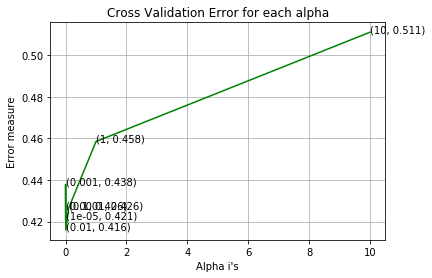

For values of best alpha =  0.01 The train log loss is: 0.40789399542051274
For values of best alpha =  0.01 The test log loss is: 0.41597950083313784
Total number of data points : 30000


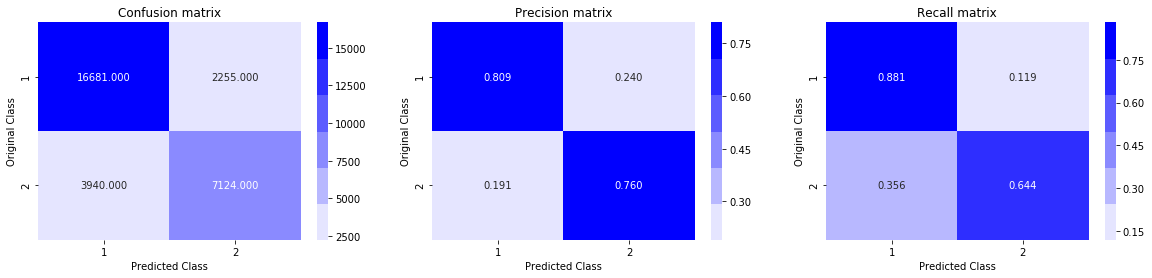

Total time taken to run this cell:  0:16:27.569972


In [31]:
start = dt.datetime.now()
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_test)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)
print('Total time taken to run this cell: ', dt.datetime.now()-start)

<h2> 4.5 Linear SVM with hyperparameter tuning </h2>

For values of alpha =  1e-05 The log loss is: 0.4358909709856658
For values of alpha =  0.0001 The log loss is: 0.47325600678254653
For values of alpha =  0.001 The log loss is: 0.487724484742427
For values of alpha =  0.01 The log loss is: 0.4743403564077363
For values of alpha =  0.1 The log loss is: 0.5334469886637074
For values of alpha =  1 The log loss is: 0.604869393207471
For values of alpha =  10 The log loss is: 0.6409528719264598


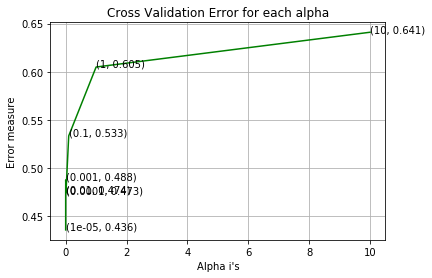

For values of best alpha =  1e-05 The train log loss is: 0.4346314662369074
For values of best alpha =  1e-05 The test log loss is: 0.4358909709856658
Total number of data points : 30000


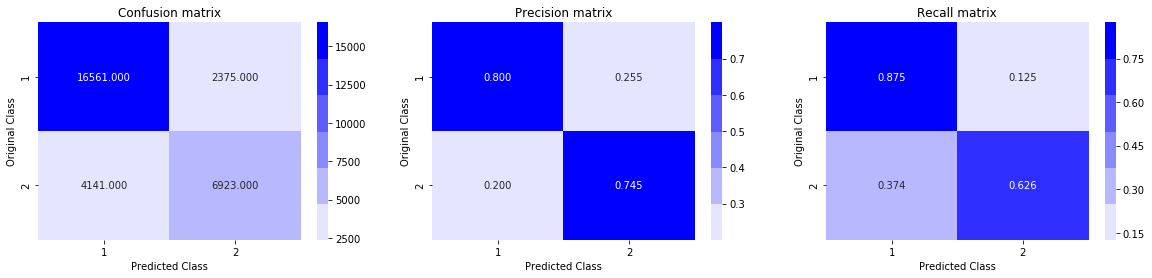

Total time taken to run this cell:  2:07:21.787953


In [15]:
start = dt.datetime.now()
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l1', loss='hinge', random_state=42)
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_test)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l1', loss='hinge', random_state=42)
clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)
print('Total time taken to run this cell: ', dt.datetime.now()-start)

<h2> 4.6 XGBoost </h2>

In [16]:
start = dt.datetime.now()
import xgboost as xgb
params = {}
params['objective'] = 'binary:logistic'
params['eval_metric'] = 'logloss'
params['eta'] = 0.02
params['max_depth'] = 4

d_train = xgb.DMatrix(X_train, label=y_train)
d_test = xgb.DMatrix(X_test, label=y_test)

watchlist = [(d_train, 'train'), (d_test, 'valid')]

bst = xgb.train(params, d_train, 400, watchlist, early_stopping_rounds=20, verbose_eval=10)

xgdmat = xgb.DMatrix(X_train,y_train)
predict_y = bst.predict(d_test)
print("The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

[0]	train-logloss:0.684813	valid-logloss:0.684885
Multiple eval metrics have been passed: 'valid-logloss' will be used for early stopping.

Will train until valid-logloss hasn't improved in 20 rounds.
[10]	train-logloss:0.614904	valid-logloss:0.615185
[20]	train-logloss:0.563579	valid-logloss:0.564123
[30]	train-logloss:0.525489	valid-logloss:0.526226
[40]	train-logloss:0.495926	valid-logloss:0.496874
[50]	train-logloss:0.473081	valid-logloss:0.474175
[60]	train-logloss:0.454754	valid-logloss:0.455969
[70]	train-logloss:0.440157	valid-logloss:0.441437
[80]	train-logloss:0.428395	valid-logloss:0.429883
[90]	train-logloss:0.418717	valid-logloss:0.420335
[100]	train-logloss:0.410756	valid-logloss:0.412517
[110]	train-logloss:0.404025	valid-logloss:0.405925
[120]	train-logloss:0.398363	valid-logloss:0.400391
[130]	train-logloss:0.393669	valid-logloss:0.395812
[140]	train-logloss:0.389762	valid-logloss:0.392067
[150]	train-logloss:0.386098	valid-logloss:0.388622
[160]	train-logloss:0.382895

Total number of data points : 30000


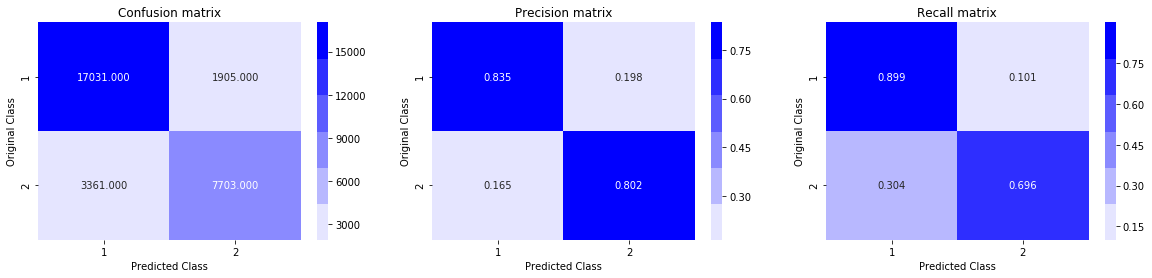

Total time taken to run this cell:  0:10:40.845603


In [17]:
predicted_y =np.array(predict_y>0.5,dtype=int)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)
print('Total time taken to run this cell: ', dt.datetime.now()-start)

<h3>4.7 Models Output</h3>

In [19]:
from prettytable import PrettyTable

table = PrettyTable()

table.field_names = ['Model', 'Hyperparameter', 'Log-Loss']

table.add_row(['Random Model', None, 0.8905921124455075])
table.add_row(['Logistic Regression', 0.01, 0.41597950083313784])
table.add_row(['Linear SVM', 1e-05, 0.4358909709856658])
table.add_row(['Xgboost', 'MaxDepth:4,eta:0.02', 0.3552402963906119])


print(table)

+---------------------+---------------------+---------------------+
|        Model        |    Hyperparameter   |       Log-Loss      |
+---------------------+---------------------+---------------------+
|     Random Model    |         None        |  0.8905921124455075 |
| Logistic Regression |         0.01        | 0.41597950083313784 |
|      Linear SVM     |        1e-05        |  0.4358909709856658 |
|       Xgboost       | MaxDepth:4,eta:0.02 |  0.3552402963906119 |
+---------------------+---------------------+---------------------+


<h1> 5. Assignments </h1>

1. Try out models (Logistic regression, Linear-SVM) with simple TF-IDF vectors instead of TD_IDF weighted word2Vec.
2. Hyperparameter tune XgBoost using RandomSearch to reduce the log-loss.


<h3>5.1 Try out models (Logistic regression, Linear-SVM) with simple TF-IDF vectors instead of TD_IDF weighted word2Vec.</h3>

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer

<h3>5.1.1 TFIDF Based Features</h3>

In [3]:
# avoid decoding problems
df = pd.read_csv("train.csv")
 
# encode questions to unicode
# https://stackoverflow.com/a/6812069
# ----------------- python 2 ---------------------
# df['question1'] = df['question1'].apply(lambda x: unicode(str(x),"utf-8"))
# df['question2'] = df['question2'].apply(lambda x: unicode(str(x),"utf-8"))
# ----------------- python 3 ---------------------
df['question1'] = df['question1'].apply(lambda x: str(x))
df['question2'] = df['question2'].apply(lambda x: str(x))

In [4]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [5]:
df.shape

(404290, 6)

In [6]:
# define train and test length (100000 = 80000+20000)
train_len = 80000
test_len = 20000

In [7]:
# prepare test and train data
q1_train_data = df['question1'][0:train_len].copy()
q1_test_data = df['question1'][train_len:train_len+test_len].copy()
q2_train_data = df['question2'][0:train_len].copy()
q2_test_data = df['question2'][train_len:train_len+test_len].copy()

In [8]:
q1_train_data.head()

0    What is the step by step guide to invest in sh...
1    What is the story of Kohinoor (Koh-i-Noor) Dia...
2    How can I increase the speed of my internet co...
3    Why am I mentally very lonely? How can I solve...
4    Which one dissolve in water quikly sugar, salt...
Name: question1, dtype: object

In [9]:
q1_test_data.head()

80000        How do I recover deleted files in an Android?
80001                   What are some good start up ideas?
80002    What reason does philosophy give for our exist...
80003    What are the differences between a sociopath a...
80004    How do I talk to my parents to give me more fr...
Name: question1, dtype: object

In [10]:
q2_train_data.head()

0    What is the step by step guide to invest in sh...
1    What would happen if the Indian government sto...
2    How can Internet speed be increased by hacking...
3    Find the remainder when [math]23^{24}[/math] i...
4              Which fish would survive in salt water?
Name: question2, dtype: object

In [11]:
q2_test_data.head()

80000    How do I recover deleted files on an Android p...
80001                  What is the best start up to start?
80002    How much income can I generate by selling an e...
80003    What are the trait differences of a sociopath ...
80004           How do I start talking more to my parents?
Name: question2, dtype: object

In [12]:
# merge texts
questions = list(q1_train_data) + list(q2_train_data)

In [13]:
# fit TfidfVectorizer on whole train vocabulary
tfidf = TfidfVectorizer(lowercase=False, ngram_range=(1,2))
tfidf.fit(questions)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=False, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 2), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [14]:
q1_train_data_vector = tfidf.transform(q1_train_data.values.tolist())
q1_test_data_vector = tfidf.transform(q1_test_data.values.tolist())
q2_train_data_vector = tfidf.transform(q2_train_data.values.tolist())
q2_test_data_vector = tfidf.transform(q2_test_data.values.tolist())

In [15]:
print("Shape of Question1 Data:", q1_train_data_vector.shape, q1_test_data_vector.shape)
print("Shape of Question2 Data:", q2_train_data_vector.shape, q2_test_data_vector.shape)

Shape of Question1 Data: (80000, 475311) (20000, 475311)
Shape of Question2 Data: (80000, 475311) (20000, 475311)


In [16]:
from scipy.sparse import hstack

In [17]:
x_train_ques = hstack([q1_train_data_vector, q2_train_data_vector])
x_test_ques = hstack([q1_test_data_vector, q2_test_data_vector])

In [18]:
x_train_ques.shape, x_test_ques.shape

((80000, 950622), (20000, 950622))

In [19]:
df = df.head(100000)

In [20]:
df.columns

Index(['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate'], dtype='object')

In [21]:
y_train = df['is_duplicate'][0:train_len].values.tolist()
y_test = df['is_duplicate'][train_len:train_len+test_len].values.tolist()

In [22]:
len(y_train), len(y_test)

(80000, 20000)

In [23]:
y_train[0:10]

[0, 0, 0, 0, 0, 1, 0, 1, 0, 0]

In [24]:
y_test[0:10]

[1, 1, 0, 1, 0, 0, 1, 0, 0, 1]

In [25]:
a = df['is_duplicate'][80000:5+80000].values.tolist()
a

[1, 1, 0, 1, 0]

In [26]:
#prepro_features_train.csv (Simple Preprocessing Feartures)
#nlp_features_train.csv (NLP Features)
if os.path.isfile('nlp_features_train.csv'):
    dfnlp = pd.read_csv("nlp_features_train.csv",encoding='latin-1')
else:
    print("download nlp_features_train.csv from drive or run previous notebook")

if os.path.isfile('df_fe_without_preprocessing_train.csv'):
    dfppro = pd.read_csv("df_fe_without_preprocessing_train.csv",encoding='latin-1')
else:
    print("download df_fe_without_preprocessing_train.csv from drive or run previous notebook")

In [27]:
df1 = dfnlp.drop(['qid1','qid2','question1','question2'],axis=1)
df2 = dfppro.drop(['qid1','qid2','question1','question2','is_duplicate'],axis=1)
df3 = df.drop(['qid1','qid2','question1','question2','is_duplicate'],axis=1)
# df3_q1 = pd.DataFrame(df3.q1_feats_m.values.tolist(), index= df3.index)
# df3_q2 = pd.DataFrame(df3.q2_feats_m.values.tolist(), index= df3.index)

df1.columns, df2.columns, df3.columns

(Index(['id', 'is_duplicate', 'cwc_min', 'cwc_max', 'csc_min', 'csc_max',
        'ctc_min', 'ctc_max', 'last_word_eq', 'first_word_eq', 'abs_len_diff',
        'mean_len', 'token_set_ratio', 'token_sort_ratio', 'fuzz_ratio',
        'fuzz_partial_ratio', 'longest_substr_ratio'],
       dtype='object'),
 Index(['id', 'freq_qid1', 'freq_qid2', 'q1len', 'q2len', 'q1_n_words',
        'q2_n_words', 'word_Common', 'word_Total', 'word_share', 'freq_q1+q2',
        'freq_q1-q2'],
       dtype='object'),
 Index(['id'], dtype='object'))

In [28]:
df1 = df1.drop(['id', 'is_duplicate'], axis=1)
df2 = df2.drop(['id'], axis=1)

df1.columns, df2.columns

(Index(['cwc_min', 'cwc_max', 'csc_min', 'csc_max', 'ctc_min', 'ctc_max',
        'last_word_eq', 'first_word_eq', 'abs_len_diff', 'mean_len',
        'token_set_ratio', 'token_sort_ratio', 'fuzz_ratio',
        'fuzz_partial_ratio', 'longest_substr_ratio'],
       dtype='object'),
 Index(['freq_qid1', 'freq_qid2', 'q1len', 'q2len', 'q1_n_words', 'q2_n_words',
        'word_Common', 'word_Total', 'word_share', 'freq_q1+q2', 'freq_q1-q2'],
       dtype='object'))

In [29]:
df1.head()

,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,token_set_ratio,token_sort_ratio,fuzz_ratio,fuzz_partial_ratio,longest_substr_ratio
0,0.999980,0.833319,0.999983,0.999983,0.916659,0.785709,0.0,1.0,2.0,13.0,100,93,93,100,0.982759
1,0.799984,0.399996,0.749981,0.599988,0.699993,0.466664,0.0,1.0,5.0,12.5,86,63,66,75,0.596154
2,0.399992,0.333328,0.399992,0.249997,0.399996,0.285712,0.0,1.0,4.0,12.0,63,63,43,47,0.166667
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,2.0,12.0,28,24,9,14,0.039216
4,0.399992,0.199998,0.999950,0.666644,0.571420,0.307690,0.0,1.0,6.0,10.0,67,47,35,56,0.175000


In [30]:
df2.head()

,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,freq_q1+q2,freq_q1-q2
0,1,1,66,57,14,12,10.0,23.0,0.434783,2,0
1,4,1,51,88,8,13,4.0,20.0,0.200000,5,3
2,1,1,73,59,14,10,4.0,24.0,0.166667,2,0
3,1,1,50,65,11,9,0.0,19.0,0.000000,2,0
4,3,1,76,39,13,7,2.0,20.0,0.100000,4,2


In [31]:
df3.head()

,id
0,0
1,1
2,2
3,3
4,4


In [32]:
df1.shape, df2.shape, df3.shape

((404290, 15), (404290, 11), (100000, 1))

In [33]:
from scipy import sparse

In [34]:
feature_train_df_1 = sparse.csr_matrix(df1[0:train_len])#.to_sparse())
feature_test_df_1 = sparse.csr_matrix(df1[train_len:train_len+test_len])#.to_sparse()
feature_train_df_2 = sparse.csr_matrix(df2[0:train_len])#.to_sparse()
feature_test_df_2 = sparse.csr_matrix(df2[train_len:train_len+test_len])#.to_sparse()

In [35]:
final_train = hstack((feature_train_df_1, feature_train_df_2, x_train_ques))
final_test = hstack((feature_test_df_1, feature_test_df_2, x_test_ques))
print(final_train.shape, final_test.shape)

(80000, 950648) (20000, 950648)


In [36]:
print("Number of features in nlp data:", feature_train_df_1.shape[1])
print("Number of features in preprocessed data :", feature_train_df_2.shape[1])
print("Number of features in question1 data :", q1_train_data_vector.shape[1])
print("Number of features in question2 data :", q2_train_data_vector.shape[1])
print("Number of features in final data  :", final_train.shape[1])

Number of features in nlp data: 15
Number of features in preprocessed data : 11
Number of features in question1 data : 475311
Number of features in question2 data : 475311
Number of features in final data  : 950648


In [38]:
# storing the final features to pkl file
import pickle
dir_path = '.'
if not os.path.isfile(os.path.join(dir_path, 'final_features_tfidf.pkl')):
    with open(os.path.join(dir_path, 'final_features_tfidf.pkl'), 'wb') as f:
        final_data = {}
        final_data['final_train'] = final_train
        final_data['final_test'] = final_test
        final_data['y_train'] = y_train
        final_data['y_test'] = y_test
        pickle.dump(final_data, f)

In [39]:
# restoring final features from pkl file
import pickle
if os.path.isfile(os.path.join(dir_path, 'final_features_tfidf.pkl')):
    with open(os.path.join(dir_path, 'final_features_tfidf.pkl'), 'rb') as f:
        final_data = pickle.load(f)
final_data.keys()

dict_keys(['final_train', 'final_test', 'y_train', 'y_test'])

<h3>5.1.2 Logistic Regression (included hyperparameter tuning) with TFIDF</h3>

For values of alpha =  1e-05 The log loss is: 0.4140181065549573
For values of alpha =  0.0001 The log loss is: 0.4193929692578037
For values of alpha =  0.001 The log loss is: 0.4286001292713021
For values of alpha =  0.01 The log loss is: 0.4566171682132662
For values of alpha =  0.1 The log loss is: 0.46877360638703686
For values of alpha =  1 The log loss is: 0.5001071999997878
For values of alpha =  10 The log loss is: 0.5510571434546174


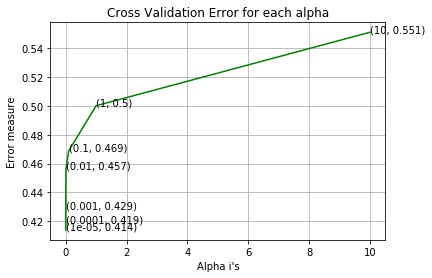

For values of best alpha =  1e-05 The train log loss is: 0.4024544707546233
For values of best alpha =  1e-05 The test log loss is: 0.4140181065549573
Total number of data points : 20000


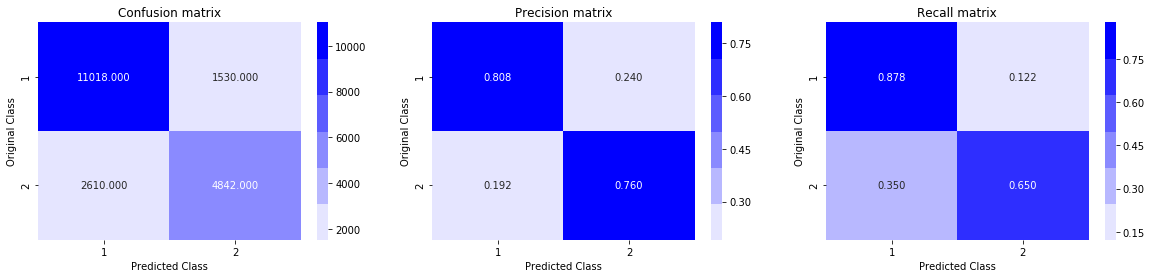

Total time taken to run this cell:  0:03:30.543180


In [42]:
start = dt.datetime.now()
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(final_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(final_train, y_train)
    predict_y = sig_clf.predict_proba(final_test)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(final_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(final_train, y_train)

predict_y = sig_clf.predict_proba(final_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(final_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)
print('Total time taken to run this cell: ', dt.datetime.now()-start)

<h3>5.1.3 Linear SVM (included hyperparameter tuning)  with TFIDF</h3>

For values of alpha =  1e-05 The log loss is: 0.44965497921483527
For values of alpha =  0.0001 The log loss is: 0.4669603586163743
For values of alpha =  0.001 The log loss is: 0.4794782794453354
For values of alpha =  0.01 The log loss is: 0.5008481434442639
For values of alpha =  0.1 The log loss is: 0.49218767296161897
For values of alpha =  1 The log loss is: 0.580802468973458
For values of alpha =  10 The log loss is: 0.6408841734577491


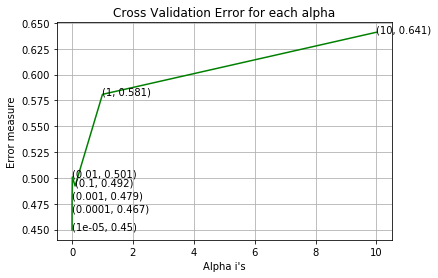

For values of best alpha =  1e-05 The train log loss is: 0.43964101821105994
For values of best alpha =  1e-05 The test log loss is: 0.44965497921483527
Total number of data points : 20000


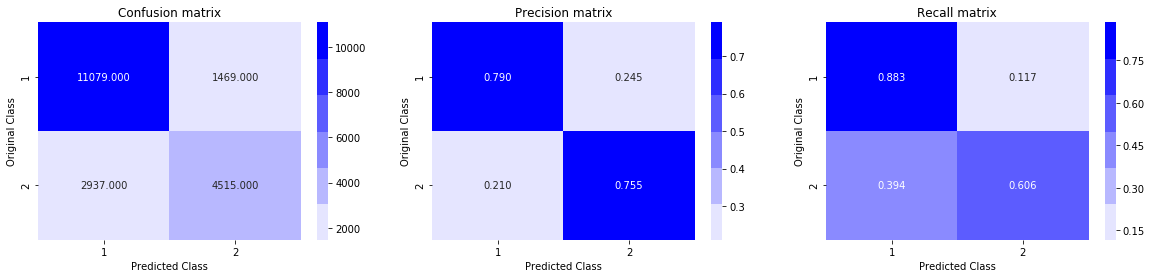

Total time taken to run this cell:  0:13:20.618174


In [43]:
start = dt.datetime.now()
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l1', loss='hinge', random_state=42)
    clf.fit(final_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(final_train, y_train)
    predict_y = sig_clf.predict_proba(final_test)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l1', loss='hinge', random_state=42)
clf.fit(final_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(final_train, y_train)

predict_y = sig_clf.predict_proba(final_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(final_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)
print('Total time taken to run this cell: ', dt.datetime.now()-start)

<h3>5.2 Hyperparameter tune XgBoost using RandomSearch to reduce the log-loss. Used Same DataSet i.e. TFIDFW2V</h3>

<h3>5.2.1 Preprocess TFIDFW2V Data i.e Fit train data then transform test data on it</h3>

In [3]:
# avoid decoding problems
df = pd.read_csv("train.csv")
 
# encode questions to unicode
# https://stackoverflow.com/a/6812069
# ----------------- python 2 ---------------------
# df['question1'] = df['question1'].apply(lambda x: unicode(str(x),"utf-8"))
# df['question2'] = df['question2'].apply(lambda x: unicode(str(x),"utf-8"))
# ----------------- python 3 ---------------------
df['question1'] = df['question1'].apply(lambda x: str(x))
df['question2'] = df['question2'].apply(lambda x: str(x))

In [4]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [5]:
df.shape

(404290, 6)

In [6]:
# define train and test length (100000 = 80000+20000)
train_len = 80000
test_len = 20000

In [7]:
# prepare test and train data
q1_train_data = df['question1'][0:train_len].copy()
q1_test_data = df['question1'][train_len:train_len+test_len].copy()
q2_train_data = df['question2'][0:train_len].copy()
q2_test_data = df['question2'][train_len:train_len+test_len].copy()

In [8]:
q1_train_data.head()

0    What is the step by step guide to invest in sh...
1    What is the story of Kohinoor (Koh-i-Noor) Dia...
2    How can I increase the speed of my internet co...
3    Why am I mentally very lonely? How can I solve...
4    Which one dissolve in water quikly sugar, salt...
Name: question1, dtype: object

In [9]:
q1_test_data.head()

80000        How do I recover deleted files in an Android?
80001                   What are some good start up ideas?
80002    What reason does philosophy give for our exist...
80003    What are the differences between a sociopath a...
80004    How do I talk to my parents to give me more fr...
Name: question1, dtype: object

In [10]:
q2_train_data.head()

0    What is the step by step guide to invest in sh...
1    What would happen if the Indian government sto...
2    How can Internet speed be increased by hacking...
3    Find the remainder when [math]23^{24}[/math] i...
4              Which fish would survive in salt water?
Name: question2, dtype: object

In [11]:
q2_test_data.head()

80000    How do I recover deleted files on an Android p...
80001                  What is the best start up to start?
80002    How much income can I generate by selling an e...
80003    What are the trait differences of a sociopath ...
80004           How do I start talking more to my parents?
Name: question2, dtype: object

In [12]:
# merge texts
questions = list(q1_train_data) + list(q2_train_data)

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
# merge texts
# questions = list(df['question1']) + list(df['question2'])

tfidf = TfidfVectorizer(lowercase=False, )
tfidf.fit(questions)

# dict key:word and value:tf-idf score
word2tfidf = dict(zip(tfidf.get_feature_names(), tfidf.idf_))

- After we find TF-IDF scores, we convert each question to a weighted average of word2vec vectors by these scores.
- here we use a pre-trained GLOVE model which comes free with "Spacy".  https://spacy.io/usage/vectors-similarity
- It is trained on Wikipedia and therefore, it is stronger in terms of word semantics. 

In [14]:
import spacy
# en_vectors_web_lg, which includes over 1 million unique vectors.
nlp = spacy.load('en_core_web_lg')#en_core_web_sm

In [16]:
from tqdm import tqdm

In [17]:
vecs1 = []
# https://github.com/noamraph/tqdm
# tqdm is used to print the progress bar
for qu1 in tqdm(list(q1_train_data.values.tolist())):
    doc1 = nlp(qu1) 
    # 300 is the number of dimensions of vectors 
    mean_vec1 = np.zeros([len(doc1), len(doc1[0].vector)])
    for word1 in doc1:
        # word2vec
        vec1 = word1.vector
        # fetch df score
        try:
            idf = word2tfidf[str(word1)]
        except:
            idf = 0
        # compute final vec
        mean_vec1 += vec1 * idf
    mean_vec1 = mean_vec1.mean(axis=0)
    vecs1.append(mean_vec1)
q1_train_data_vector = list(vecs1)

100%|██████████| 80000/80000 [09:55<00:00, 134.30it/s]


In [18]:
vecs2 = []
# https://github.com/noamraph/tqdm
# tqdm is used to print the progress bar
for qu2 in tqdm(list(q1_test_data.values.tolist())):
    doc2 = nlp(qu2) 
    mean_vec2 = np.zeros([len(doc2), len(doc2[0].vector)])
    for word2 in doc2:
        # word2vec
        vec2 = word2.vector
        # fetch df score
        try:
            idf = word2tfidf[str(word2)]
        except:
            #print word
            idf = 0
        # compute final vec
        mean_vec2 += vec2 * idf
    mean_vec2 = mean_vec2.mean(axis=0)
    vecs2.append(mean_vec2)
q1_test_data_vector = list(vecs2)

100%|██████████| 20000/20000 [02:06<00:00, 157.52it/s]


In [19]:
vecs3 = []
# https://github.com/noamraph/tqdm
# tqdm is used to print the progress bar
for qu3 in tqdm(list(q2_train_data.values.tolist())):
    doc3 = nlp(qu3) 
    mean_vec3 = np.zeros([len(doc3), len(doc3[0].vector)])
    for word3 in doc3:
        # word2vec
        vec3 = word3.vector
        # fetch df score
        try:
            idf = word2tfidf[str(word3)]
        except:
            #print word
            idf = 0
        # compute final vec
        mean_vec3 += vec3 * idf
    mean_vec3 = mean_vec3.mean(axis=0)
    vecs3.append(mean_vec3)
q2_train_data_vector = list(vecs3)

100%|██████████| 80000/80000 [08:20<00:00, 159.75it/s]


In [20]:
vecs4 = []
# https://github.com/noamraph/tqdm
# tqdm is used to print the progress bar
for qu4 in tqdm(list(q2_test_data.values.tolist())):
    doc4 = nlp(qu4) 
    mean_vec4 = np.zeros([len(doc4), len(doc4[0].vector)])
    for word4 in doc4:
        # word2vec
        vec4 = word4.vector
        # fetch df score
        try:
            idf = word2tfidf[str(word4)]
        except:
            #print word
            idf = 0
        # compute final vec
        mean_vec4 += vec4 * idf
    mean_vec4 = mean_vec4.mean(axis=0)
    vecs4.append(mean_vec4)
q2_test_data_vector = list(vecs4)

100%|██████████| 20000/20000 [02:07<00:00, 156.43it/s]


In [ ]:
# q1_train_data_vector = tfidf.transform(q1_train_data.values.tolist())
# q1_test_data_vector = tfidf.transform(q1_test_data.values.tolist())
# q2_train_data_vector = tfidf.transform(q2_train_data.values.tolist())
# q2_test_data_vector = tfidf.transform(q2_test_data.values.tolist())

In [22]:
print("Shape of Question1 Data:", len(q1_train_data_vector), len(q1_test_data_vector))
print("Shape of Question2 Data:", len(q2_train_data_vector), len(q2_test_data_vector))

Shape of Question1 Data: 80000 20000
Shape of Question2 Data: 80000 20000


In [32]:
q1_train_data_vector_real = q1_train_data_vector
q1_test_data_vector_real = q1_test_data_vector
q2_train_data_vector_real = q2_train_data_vector
q2_test_data_vector_real = q2_test_data_vector

In [33]:
q1_train_data_vector_df = pd.DataFrame(q1_train_data_vector_real)

In [35]:
q1_test_data_vector_df = pd.DataFrame(q1_test_data_vector_real)

In [36]:
q2_train_data_vector_df = pd.DataFrame(q2_train_data_vector_real)

In [37]:
q2_test_data_vector_df = pd.DataFrame(q2_test_data_vector_real)

In [38]:
q1_train_data_vector_df.shape, q1_test_data_vector_df.shape, q2_train_data_vector_df.shape, q2_test_data_vector_df.shape

((80000, 300), (20000, 300), (80000, 300), (20000, 300))

In [39]:
from scipy.sparse import hstack

In [41]:
from scipy import sparse

In [45]:
x_train_ques_1 = sparse.csr_matrix(q1_train_data_vector_df)
x_test_ques_1 = sparse.csr_matrix(q1_test_data_vector_df)
x_train_ques_2 = sparse.csr_matrix(q2_train_data_vector_df)
x_test_ques_2 = sparse.csr_matrix(q2_test_data_vector_df)

In [46]:
# a

In [47]:
# x_train_ques = hstack([q1_train_data_vector_df, q2_train_data_vector_df])
# x_test_ques = hstack([q1_test_data_vector_df, q2_test_data_vector_df])

In [48]:
x_train_ques_1.shape, x_test_ques_1.shape, x_train_ques_2.shape, x_test_ques_2.shape

((80000, 300), (20000, 300), (80000, 300), (20000, 300))

In [49]:
df = df.head(100000)

In [50]:
df.columns

Index(['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate'], dtype='object')

In [51]:
y_train = df['is_duplicate'][0:train_len].values.tolist()
y_test = df['is_duplicate'][train_len:train_len+test_len].values.tolist()

In [52]:
len(y_train), len(y_test)

(80000, 20000)

In [53]:
y_train[0:10]

[0, 0, 0, 0, 0, 1, 0, 1, 0, 0]

In [54]:
y_test[0:10]

[1, 1, 0, 1, 0, 0, 1, 0, 0, 1]

In [55]:
a = df['is_duplicate'][80000:5+80000].values.tolist()
a

[1, 1, 0, 1, 0]

In [56]:
#prepro_features_train.csv (Simple Preprocessing Feartures)
#nlp_features_train.csv (NLP Features)
if os.path.isfile('nlp_features_train.csv'):
    dfnlp = pd.read_csv("nlp_features_train.csv",encoding='latin-1')
else:
    print("download nlp_features_train.csv from drive or run previous notebook")

if os.path.isfile('df_fe_without_preprocessing_train.csv'):
    dfppro = pd.read_csv("df_fe_without_preprocessing_train.csv",encoding='latin-1')
else:
    print("download df_fe_without_preprocessing_train.csv from drive or run previous notebook")

In [57]:
df1 = dfnlp.drop(['qid1','qid2','question1','question2'],axis=1)
df2 = dfppro.drop(['qid1','qid2','question1','question2','is_duplicate'],axis=1)
df3 = df.drop(['qid1','qid2','question1','question2','is_duplicate'],axis=1)
# df3_q1 = pd.DataFrame(df3.q1_feats_m.values.tolist(), index= df3.index)
# df3_q2 = pd.DataFrame(df3.q2_feats_m.values.tolist(), index= df3.index)

df1.columns, df2.columns, df3.columns

(Index(['id', 'is_duplicate', 'cwc_min', 'cwc_max', 'csc_min', 'csc_max',
        'ctc_min', 'ctc_max', 'last_word_eq', 'first_word_eq', 'abs_len_diff',
        'mean_len', 'token_set_ratio', 'token_sort_ratio', 'fuzz_ratio',
        'fuzz_partial_ratio', 'longest_substr_ratio'],
       dtype='object'),
 Index(['id', 'freq_qid1', 'freq_qid2', 'q1len', 'q2len', 'q1_n_words',
        'q2_n_words', 'word_Common', 'word_Total', 'word_share', 'freq_q1+q2',
        'freq_q1-q2'],
       dtype='object'),
 Index(['id'], dtype='object'))

In [58]:
df1 = df1.drop(['id', 'is_duplicate'], axis=1)
df2 = df2.drop(['id'], axis=1)

df1.columns, df2.columns

(Index(['cwc_min', 'cwc_max', 'csc_min', 'csc_max', 'ctc_min', 'ctc_max',
        'last_word_eq', 'first_word_eq', 'abs_len_diff', 'mean_len',
        'token_set_ratio', 'token_sort_ratio', 'fuzz_ratio',
        'fuzz_partial_ratio', 'longest_substr_ratio'],
       dtype='object'),
 Index(['freq_qid1', 'freq_qid2', 'q1len', 'q2len', 'q1_n_words', 'q2_n_words',
        'word_Common', 'word_Total', 'word_share', 'freq_q1+q2', 'freq_q1-q2'],
       dtype='object'))

In [59]:
df1.head()

,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,token_set_ratio,token_sort_ratio,fuzz_ratio,fuzz_partial_ratio,longest_substr_ratio
0,0.999980,0.833319,0.999983,0.999983,0.916659,0.785709,0.0,1.0,2.0,13.0,100,93,93,100,0.982759
1,0.799984,0.399996,0.749981,0.599988,0.699993,0.466664,0.0,1.0,5.0,12.5,86,63,66,75,0.596154
2,0.399992,0.333328,0.399992,0.249997,0.399996,0.285712,0.0,1.0,4.0,12.0,63,63,43,47,0.166667
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,2.0,12.0,28,24,9,14,0.039216
4,0.399992,0.199998,0.999950,0.666644,0.571420,0.307690,0.0,1.0,6.0,10.0,67,47,35,56,0.175000


In [60]:
df2.head()

,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,freq_q1+q2,freq_q1-q2
0,1,1,66,57,14,12,10.0,23.0,0.434783,2,0
1,4,1,51,88,8,13,4.0,20.0,0.200000,5,3
2,1,1,73,59,14,10,4.0,24.0,0.166667,2,0
3,1,1,50,65,11,9,0.0,19.0,0.000000,2,0
4,3,1,76,39,13,7,2.0,20.0,0.100000,4,2


In [61]:
df3.head()

,id
0,0
1,1
2,2
3,3
4,4


In [62]:
df1.shape, df2.shape, df3.shape

((404290, 15), (404290, 11), (100000, 1))

In [63]:
from scipy import sparse

In [64]:
feature_train_df_1 = sparse.csr_matrix(df1[0:train_len])#.to_sparse())
feature_test_df_1 = sparse.csr_matrix(df1[train_len:train_len+test_len])#.to_sparse()
feature_train_df_2 = sparse.csr_matrix(df2[0:train_len])#.to_sparse()
feature_test_df_2 = sparse.csr_matrix(df2[train_len:train_len+test_len])#.to_sparse()

In [66]:
final_train = hstack((feature_train_df_1, feature_train_df_2, x_train_ques_1, x_train_ques_2))
final_test = hstack((feature_test_df_1, feature_test_df_2, x_test_ques_1, x_test_ques_2))
print(final_train.shape, final_test.shape)

(80000, 626) (20000, 626)


In [69]:
print("Number of features in nlp data:", feature_train_df_1.shape[1])
print("Number of features in preprocessed data :", feature_train_df_2.shape[1])
print("Number of features in question1 data :", len(q1_train_data_vector[0]))
print("Number of features in question2 data :", len(q2_train_data_vector[0]))
print("Number of features in final data  :", final_train.shape[1])

Number of features in nlp data: 15
Number of features in preprocessed data : 11
Number of features in question1 data : 300
Number of features in question2 data : 300
Number of features in final data  : 626


In [70]:
# storing the final features to pkl file
import pickle
dir_path = '.'
if not os.path.isfile(os.path.join(dir_path, 'final_features_tfidfw2v.pkl')):
    with open(os.path.join(dir_path, 'final_features_tfidfw2v.pkl'), 'wb') as f:
        final_data = {}
        final_data['final_train'] = final_train
        final_data['final_test'] = final_test
        final_data['y_train'] = y_train
        final_data['y_test'] = y_test
        pickle.dump(final_data, f)

In [5]:
# restoring final features from pkl file
import pickle
dir_path = '.'
if os.path.isfile(os.path.join(dir_path, 'final_features_tfidfw2v.pkl')):
    with open(os.path.join(dir_path, 'final_features_tfidfw2v.pkl'), 'rb') as f:
        final_data = pickle.load(f)
final_data.keys()

dict_keys(['final_train', 'final_test', 'y_train', 'y_test'])

In [7]:
final_train = final_data['final_train']
final_test = final_data['final_test']
y_train = final_data['y_train']
y_test = final_data['y_test']

<h3>5.2.2 Logistic Regression (included hyperparameter tuning) with TFIDFW2V</h3>

For values of alpha =  1e-05 The log loss is: 0.4528222254310883
For values of alpha =  0.0001 The log loss is: 0.46204032650544213
For values of alpha =  0.001 The log loss is: 0.436159127992777
For values of alpha =  0.01 The log loss is: 0.43792215378677074
For values of alpha =  0.1 The log loss is: 0.4445686280511855
For values of alpha =  1 The log loss is: 0.4785482845783462
For values of alpha =  10 The log loss is: 0.5210199369936789


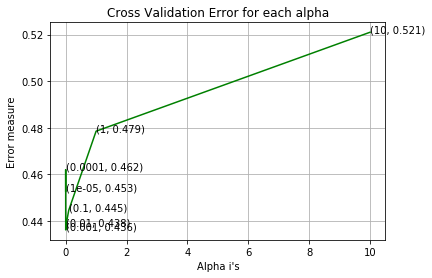

For values of best alpha =  0.001 The train log loss is: 0.42976504261399623
For values of best alpha =  0.001 The test log loss is: 0.436159127992777
Total number of data points : 20000


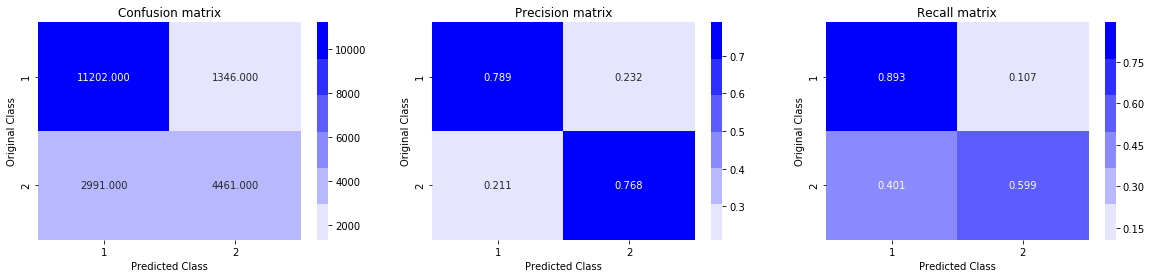

Total time taken to run this cell:  0:57:36.911350


In [75]:
start = dt.datetime.now()
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(final_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(final_train, y_train)
    predict_y = sig_clf.predict_proba(final_test)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(final_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(final_train, y_train)

predict_y = sig_clf.predict_proba(final_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(final_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)
print('Total time taken to run this cell: ', dt.datetime.now()-start)

<h3>5.2.3 Linear SVM (included hyperparameter tuning) with TFIDFW2V</h3>

For values of alpha =  1e-05 The log loss is: 0.4570607375982754
For values of alpha =  0.0001 The log loss is: 0.4717054966776061
For values of alpha =  0.001 The log loss is: 0.496387355416979
For values of alpha =  0.01 The log loss is: 0.4675490800272124
For values of alpha =  0.1 The log loss is: 0.5177872827509853
For values of alpha =  1 The log loss is: 0.6210757744330847
For values of alpha =  10 The log loss is: 0.652027518450825


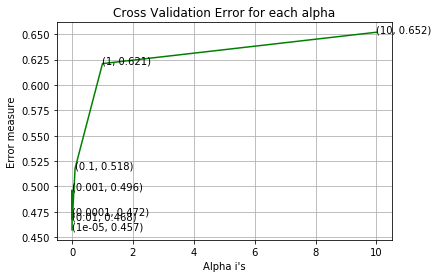

For values of best alpha =  1e-05 The train log loss is: 0.4465774886029596
For values of best alpha =  1e-05 The test log loss is: 0.4570607375982754
Total number of data points : 20000


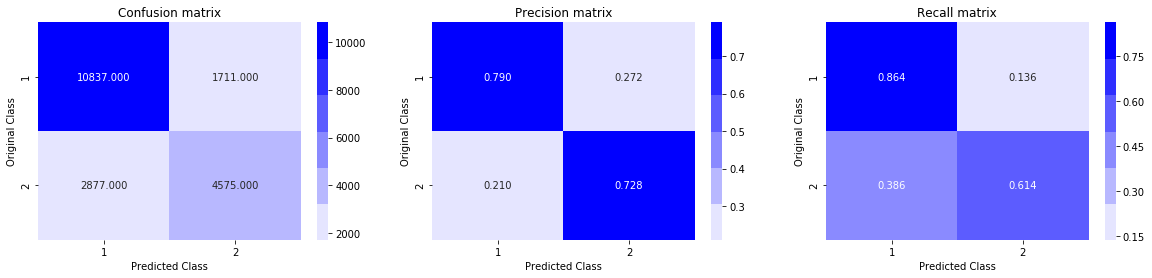

Total time taken to run this cell:  1:43:36.017388


In [9]:
start = dt.datetime.now()
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l1', loss='hinge', random_state=42)
    clf.fit(final_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(final_train, y_train)
    predict_y = sig_clf.predict_proba(final_test)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l1', loss='hinge', random_state=42)
clf.fit(final_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(final_train, y_train)

predict_y = sig_clf.predict_proba(final_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(final_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)
print('Total time taken to run this cell: ', dt.datetime.now()-start)

<h3>5.2.4 Xgboost (included hyperparameter tuning) with TFIDFW2V</h3>

In [10]:
start = dt.datetime.now()
import xgboost as xgb
params = {}
params['objective'] = 'binary:logistic'
params['eval_metric'] = 'logloss'
params['eta'] = 0.02
params['max_depth'] = 4

d_train = xgb.DMatrix(final_train, label=y_train)
d_test = xgb.DMatrix(final_test, label=y_test)

watchlist = [(d_train, 'train'), (d_test, 'valid')]

bst = xgb.train(params, d_train, 400, watchlist, early_stopping_rounds=20, verbose_eval=10)

xgdmat = xgb.DMatrix(final_train,y_train)
predict_y = bst.predict(d_test)
print("The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

[0]	train-logloss:0.68482	valid-logloss:0.684945
Multiple eval metrics have been passed: 'valid-logloss' will be used for early stopping.

Will train until valid-logloss hasn't improved in 20 rounds.
[10]	train-logloss:0.616184	valid-logloss:0.61754
[20]	train-logloss:0.565189	valid-logloss:0.567302
[30]	train-logloss:0.527267	valid-logloss:0.529908
[40]	train-logloss:0.497602	valid-logloss:0.500854
[50]	train-logloss:0.474749	valid-logloss:0.478433
[60]	train-logloss:0.456418	valid-logloss:0.460625
[70]	train-logloss:0.441652	valid-logloss:0.446347
[80]	train-logloss:0.429682	valid-logloss:0.434825
[90]	train-logloss:0.41981	valid-logloss:0.425401
[100]	train-logloss:0.411667	valid-logloss:0.417563
[110]	train-logloss:0.404821	valid-logloss:0.411104
[120]	train-logloss:0.399146	valid-logloss:0.405632
[130]	train-logloss:0.394256	valid-logloss:0.40095
[140]	train-logloss:0.389993	valid-logloss:0.396995
[150]	train-logloss:0.386207	valid-logloss:0.393519
[160]	train-logloss:0.383222	val

In [11]:
from sklearn.model_selection import RandomizedSearchCV

In [12]:
import xgboost as xgb

<h3>5.2.5 Hyperparameter</h3>

In [16]:
# max_depth=[int(x) for x in np.linspace(start=2, stop=10, num=9)]
# n_estimators=[int(x) for x in np.linspace(start=50, stop=300, num=6)]
# learning_rate=[float(x) for x in np.linspace(start=0.1, stop=0.9, num=9)]
# booster="gbtree", "gblinear",

# random_grid = {
#     'max_depth' : max_depth,
#     'n_estimators' : n_estimators,
#     'learning_rate' : learning_rate,
#     'booster' : booster
# }

# random_grid={
#     'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
#     'n_estimators':[100,200,500,1000,2000],
#     'max_depth':[2,3,4,5],
#     'colsample_bytree':[0.1,0.3,0.5,1],
#     'subsample':[0.1,0.3,0.5,1]
# }

# As per applied AI instructor I will optimize only n_estimators and max_depth upto 10
random_grid={
    'n_estimators':[100,200,500,1000,2000],
    'max_depth':[2,3,4,5,6,7,8,9,10],
}

random_grid

{'n_estimators': [100, 200, 500, 1000, 2000],
 'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]}

In [17]:
# # Use the random grid to search for best hyperparameters
# # First create the base model to tune
# xgb_random = xgb.XGBRegressor(nthread=-1, objective='reg:linear', missing=None, seed=8)
# # Random search of parameters, using 3 fold cross validation, 
# # search across 100 different combinations, and use all available cores
# xgb_random = RandomizedSearchCV(estimator = xgb_random, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# # Fit the random search model
# xgb_random.fit(x_train, y_train)
# Use the random grid to search for best hyperparameters
# First create the base model to tune
#  class xgboost.XGBRegressor(max_depth=3, learning_rate=0.1, n_estimators=100, verbosity=1, 
# objective='reg:squarederror', booster='gbtree', tree_method='auto', 
# n_jobs=1, gamma=0, min_child_weight=1, max_delta_step=0, subsample=1, 
# colsample_bytree=1, colsample_bylevel=1, colsample_bynode=1, 
# reg_alpha=0, reg_lambda=1, scale_pos_weight=1, base_score=0.5, 
# random_state=0, missing=None, num_parallel_tree=1, importance_type='gain', **kwargs)
# xgb_random = xgb.XGBRegressor(n_jobs=-1)#, random_state=15
# xgb_random = xgb.XGBRegressor(nthread=-1, objective='reg:linear', missing=None, seed=8)
# initialize XGBClassifier
xgb_random = xgb.XGBClassifier(n_jobs=-1)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
xgb_random = RandomizedSearchCV(estimator = xgb_random, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=3, n_jobs = -1)#random_state=15,
# Fit the random search model
xgb_random.fit(final_train,y_train)

Fitting 3 folds for each of 45 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed: 440.9min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed: 4759.6min
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed: 5991.6min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=-1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, scale_pos_weight=1,
                                           seed=None, silent=None, subsample=1,
                                           verbosity=1),
         

In [18]:
# select best params
xgb_random.best_params_

{'n_estimators': 2000, 'max_depth': 7}

<h3>5.2.6 Run Xgboost using best Hyperparameter</h3>

In [20]:
# {'subsample': 1,
#  'n_estimators': 1000,
#  'max_depth': 5,
#  'learning_rate': 0.05,
#  'colsample_bytree': 0.3}

start = dt.datetime.now()
import xgboost as xgb
params = {}
params['objective'] = 'binary:logistic'
params['eval_metric'] = 'logloss'
# params['subsample'] = 1
params['n_estimators'] = 2000
params['max_depth'] = 7
# params['eta'] = 0.05
# params['colsample_bytree'] = 0.3


# {'learning_rate': [0.01, 0.03, 0.05, 0.1, 0.15, 0.2],
#  'n_estimators': [100, 200, 500, 1000, 2000],
#  'max_depth': [2, 3, 4, 5],
#  'colsample_bytree': [0.1, 0.3, 0.5, 1],
#  'subsample': [0.1, 0.3, 0.5, 1]}

d_train = xgb.DMatrix(final_train, label=y_train)
d_test = xgb.DMatrix(final_test, label=y_test)

watchlist = [(d_train, 'train'), (d_test, 'valid')]

bst = xgb.train(params, d_train, 400, watchlist, early_stopping_rounds=20, verbose_eval=10)

xgdmat = xgb.DMatrix(final_train,y_train)
predict_y = bst.predict(d_test)
print("The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

[0]	train-logloss:0.566011	valid-logloss:0.57037
Multiple eval metrics have been passed: 'valid-logloss' will be used for early stopping.

Will train until valid-logloss hasn't improved in 20 rounds.
[10]	train-logloss:0.333082	valid-logloss:0.362079
[20]	train-logloss:0.296601	valid-logloss:0.346738
[30]	train-logloss:0.262719	valid-logloss:0.340093
[40]	train-logloss:0.230755	valid-logloss:0.33808
[50]	train-logloss:0.206959	valid-logloss:0.336675
[60]	train-logloss:0.187235	valid-logloss:0.33786
[70]	train-logloss:0.168236	valid-logloss:0.338469
Stopping. Best iteration:
[50]	train-logloss:0.206959	valid-logloss:0.336675

The test log loss is: 0.3384723600838287


Total number of data points : 20000


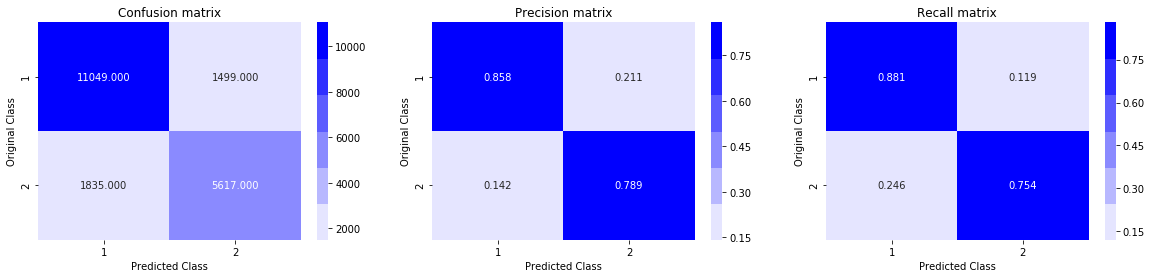

Total time taken to run this cell:  0:14:48.470554


In [21]:
predicted_y =np.array(predict_y>0.5,dtype=int)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)
print('Total time taken to run this cell: ', dt.datetime.now()-start)

<h1>6. Conclusion</h1>

<h3>6.1 Models Output</h3>

In [22]:
from prettytable import PrettyTable

table = PrettyTable()

table.field_names = ['Model', 'Vectorizer', 'Hyperparameter', 'Log Loss']

table.add_row(['Logistic Regression', 'TFIDF', 1e-05, 0.4140181065549573])
table.add_row(['Linear SVM', 'TFIDF', 1e-05, 0.44965497921483527])
table.add_row(['Logistic Regression', 'TFIDFW2V', 1e-05, 0.4140181065549573])
table.add_row(['Linear SVM', 'TFIDFW2V', 1e-05, 0.44965497921483527])
table.add_row(['Xgboost', 'TFIDFW2V', 1e-05, 0.4140181065549573])
table.add_row(['Xgboost with best hyperparameter', 'TFIDFW2V', 'n_estimators:2000, max_depth:7', 0.3384723600838287])

print(table)

+----------------------------------+------------+--------------------------------+---------------------+
|              Model               | Vectorizer |         Hyperparameter         |       Log Loss      |
+----------------------------------+------------+--------------------------------+---------------------+
|       Logistic Regression        |   TFIDF    |             1e-05              |  0.4140181065549573 |
|            Linear SVM            |   TFIDF    |             1e-05              | 0.44965497921483527 |
|       Logistic Regression        |  TFIDFW2V  |             1e-05              |  0.4140181065549573 |
|            Linear SVM            |  TFIDFW2V  |             1e-05              | 0.44965497921483527 |
|             Xgboost              |  TFIDFW2V  |             1e-05              |  0.4140181065549573 |
| Xgboost with best hyperparameter |  TFIDFW2V  | n_estimators:2000, max_depth:7 |  0.3384723600838287 |
+----------------------------------+------------+------

<h3>6.2 Steps I followed</h3>

- EDA on the data
- Pick 100K data points, split train and test then create TFID vectors of questions and run following ML Models on that:
    - Logistic Regression
    - Linear SVM
- Pick 100K data points, split train and test then create TFIDFW2V vectors of questions and run following ML Models on that:
    - Logistic Regression
    - Linear SVM
    - Xgboost
    - Xgboost with best Hyperparameter

<h3>6.3 Best Model</h3>

- Xgboost (TFIDFW2V) with best Hyperparameter gives log loss 0.3384723600838287